In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

documents = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Y = vectorizer.transform(["chrome browser to open."])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["My cat is hungry."])
prediction = model.predict(Y)
print(prediction)
 

Top terms per cluster:
Cluster 0:
 cat
 climbing
 ninja
 photo
 ve
 taken
 restaurant
 came
 play
 little
Cluster 1:
 google
 translate
 app
 feedback
 impressed
 map
 incredible
 chrome
 extension
 promoter


Prediction
[1]
[0]


/Users/ruska/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [4]:

all_text = """
Google and Facebook are strangling the free press to death. Democracy is the loser
Your 60-second guide to security stuff Google touted today at Next '18
A Guide to Using Android Without Selling Your Soul to Google
Review: Lenovo’s Google Smart Display is pretty and intelligent
Google Maps user spots mysterious object submerged off the coast of Greece - and no-one knows what it is
Android is better than IOS
In information retrieval, tf–idf or TFIDF, short for term frequency–inverse document frequency
is a numerical statistic that is intended to reflect
how important a word is to a document in a collection or corpus.
It is often used as a weighting factor in searches of information retrieval
text mining, and user modeling. The tf-idf value increases proportionally
to the number of times a word appears in the document
and is offset by the frequency of the word in the corpus
""".split("\n")[1:-1]

In [5]:
print(all_text)

['Google and Facebook are strangling the free press to death. Democracy is the loser', "Your 60-second guide to security stuff Google touted today at Next '18", 'A Guide to Using Android Without Selling Your Soul to Google', 'Review: Lenovo’s Google Smart Display is pretty and intelligent', 'Google Maps user spots mysterious object submerged off the coast of Greece - and no-one knows what it is', 'Android is better than IOS', 'In information retrieval, tf–idf or TFIDF, short for term frequency–inverse document frequency', 'is a numerical statistic that is intended to reflect', 'how important a word is to a document in a collection or corpus.', 'It is often used as a weighting factor in searches of information retrieval', 'text mining, and user modeling. The tf-idf value increases proportionally', 'to the number of times a word appears in the document', 'and is offset by the frequency of the word in the corpus']


In [10]:
import re
import string
def preprocessing(line):
    line = line.lower()
    line = re.sub(r"[{}]".format(string.punctuation), " ", line)
    return line

In [11]:
print(preprocessing('Google and Facebook are strangling the free press to death'))

google and facebook are strangling the free press to death


In [12]:
tfidf_vectorizer = TfidfVectorizer(preprocessor=preprocessing)
tfidf = tfidf_vectorizer.fit_transform(all_text)

/Users/ruska/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [14]:
print(tfidf_vectorizer)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2',
        preprocessor=<function preprocessing at 0x1a2045a488>,
        smooth_idf=True, stop_words=None, strip_accents=None,
        sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, use_idf=True, vocabulary=None)


In [13]:
print(tfidf)

  (0, 22)	0.18968078842212527
  (0, 2)	0.18968078842212527
  (0, 17)	0.30248644340248876
  (0, 5)	0.30248644340248876
  (0, 70)	0.30248644340248876
  (0, 79)	0.37936157684425054
  (0, 20)	0.30248644340248876
  (0, 55)	0.30248644340248876
  (0, 81)	0.17385257624668746
  (0, 13)	0.30248644340248876
  (0, 14)	0.30248644340248876
  (0, 35)	0.14804757753998937
  (0, 39)	0.30248644340248876
  (1, 22)	0.18728256075246552
  (1, 81)	0.17165447246261542
  (1, 92)	0.25755513657107676
  (1, 1)	0.2986619582540487
  (1, 62)	0.2986619582540487
  (1, 24)	0.25755513657107676
  (1, 63)	0.2986619582540487
  (1, 71)	0.2986619582540487
  (1, 83)	0.2986619582540487
  (1, 82)	0.2986619582540487
  (1, 7)	0.2986619582540487
  (1, 44)	0.2986619582540487
  :	:
  (10, 74)	0.3330106455660763
  (10, 41)	0.3330106455660763
  (10, 42)	0.3330106455660763
  (10, 87)	0.3330106455660763
  (10, 29)	0.3330106455660763
  (10, 57)	0.3330106455660763
  (11, 79)	0.47604409702055495
  (11, 81)	0.21815992373953516
  (11, 49)	0.2

In [ ]:
kmeans = KMeans(n_clusters=2).fit(tfidf)

In [ ]:
lines_for_predicting = ["tf and idf is awesome!", "some androids is there"]
kmeans.predict(tfidf_vectorizer.transform(lines_for_predicting))

/Users/ruska/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).


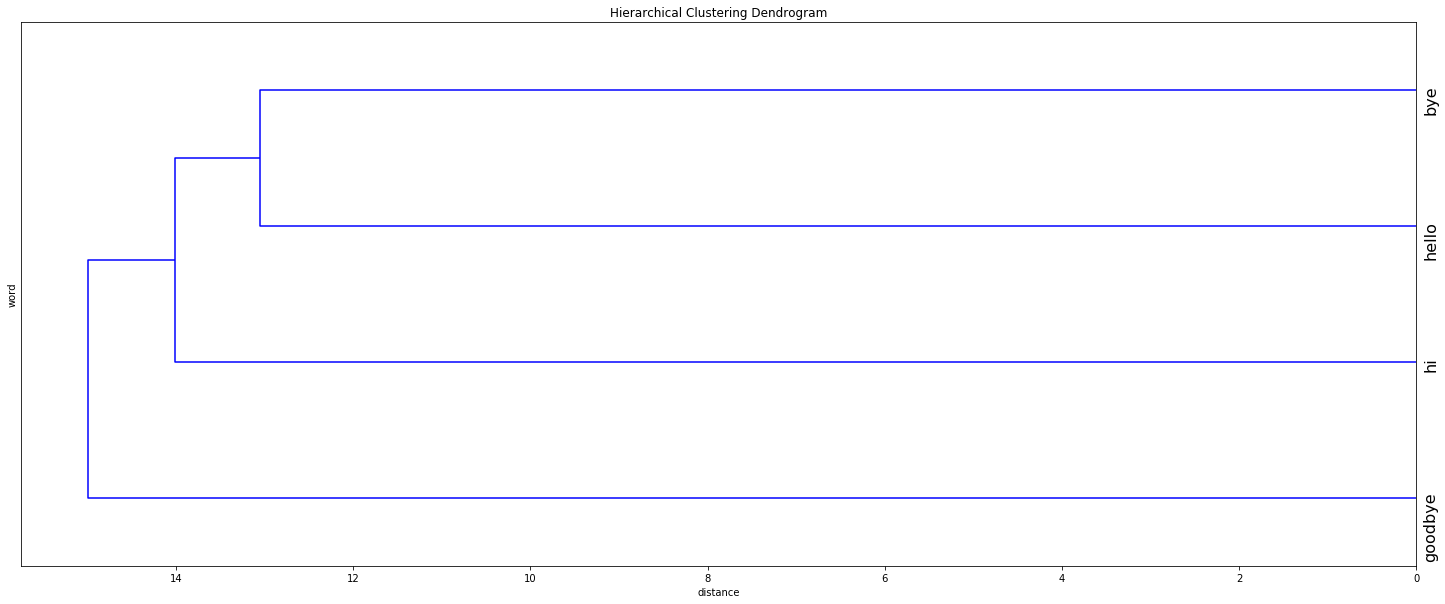

In [18]:
sentences = ['hi', 'hello', 'hi hello', 'goodbye', 'bye', 'goodbye bye']
sentences_split = [s.lower().split(' ') for s in sentences]

import gensim
model = gensim.models.Word2Vec(sentences_split, min_count=2)

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

l = linkage(model.wv.syn0, method='complete', metric='seuclidean')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('word')
plt.xlabel('distance')

dendrogram(
    l,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=16.,  # font size for the x axis labels
    orientation='right',
    leaf_label_func=lambda v: str(model.wv.index2word[v])
)
plt.show()